<a href="https://colab.research.google.com/github/glcn35/DEEPLEARNING/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_g%C3%BClcan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [77]:
# # colab Update
# !sudo apt-get update -y -q && \
# python --version && \
# pip list --outdated && \
# sudo pip3 install $(pip3 list --outdated | tail +3 | grep -v sdist | awk '{ print $1 }') --upgrade -q && \
# # pip install protobuf==3.20.* -q && \
# pip install --upgrade jax jaxlib -q

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [79]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [80]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [81]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [82]:
# Checking the shape of one image
X_train[35].shape

(28, 28)

In [83]:
X_train[35]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         37, 198,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   8,
         98,  41, 113,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  76,
         82,   0, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0, 139,
         43,   0, 193,  32,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 172,
          0,   0, 111,  82,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,  61, 139,
          0,   0,  43, 115,   0,   4,   0,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  

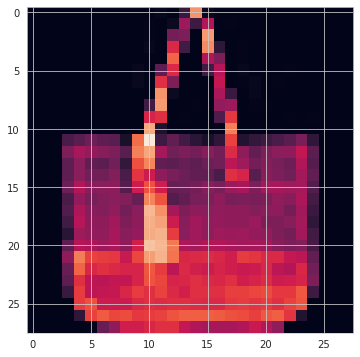

In [84]:
plt.imshow(X_train[35])
# plt.matshow(X_train[35])

In [85]:
y_train[35]

8

In [86]:
y_train.shape

(60000,)

In [87]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [88]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [89]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [90]:
y_train[0]

9

In [91]:
classes[y_train[0]]

'Ankle boot'

In [92]:
classes[int(y_train[0])]

'Ankle boot'

In [93]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 194, 211,
        196, 218, 217, 190,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0, 198, 255, 242,
        242, 237, 225, 255,  49,   0,   8,   6,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 215, 236, 202,
        221, 220, 216, 254, 118,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  47, 168, 244, 255, 227, 221,
        230, 232, 230, 231, 255, 230, 147,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,  65, 235, 232, 227, 232, 234, 226,
        228, 219, 221, 238, 225, 220, 244, 233,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  48, 202, 212, 215, 223, 225, 216,
        227, 227, 230, 229, 219, 208, 221,  95,  23,   0,   1,   0,   0,
          0,   0],
       [  

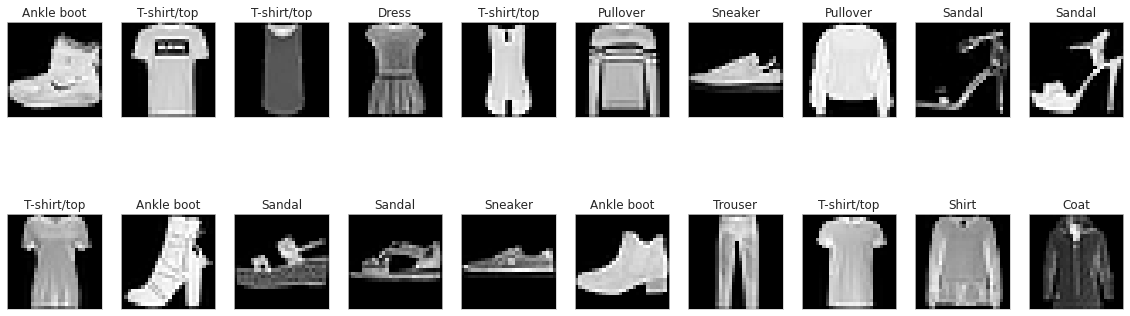

In [94]:

plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(classes[int(y_train[i])])
    plt.imshow(X_train[i],cmap='gray')
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [95]:
X_train[35].min(), X_train[35].max()

(0, 254)

In [96]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [97]:
X_train[35].min(),X_train[35].max()

(0.0, 0.99607843)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [98]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [99]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [100]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [101]:
from tensorflow.keras.utils import to_categorical
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [102]:
y_train.shape,y_train

((60000,), array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [103]:
Y__train=pd.DataFrame(y_train)
len(Y__train[0].unique()),Y__train[0].unique()


(10, array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8))

In [104]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [105]:
y_train[9],Y_train[9]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [106]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

##  Model1 Training 

In [107]:
model1 = Sequential()

# convolutional layer
model1.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model1.add(MaxPool2D(pool_size=(2, 2) ,strides=(1,1)))
# flatten output of conv
model1.add(Flatten())
# hidden layer
model1.add(Dense(128, activation='relu'))
# output layer
model1.add(Dense(10, activation='softmax'))
# compiling the sequential model
model1.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [108]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20412)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2612864   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

In [109]:
# training the model for 20 epochs
model1.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3680 - accuracy: 0.8707 - val_loss: 0.3057 - val_accuracy: 0.8923
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2471 - accuracy: 0.9117 - val_loss: 0.2985 - val_accuracy: 0.8938
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2098 - accuracy: 0.9249 - val_loss: 0.2706 - val_accuracy: 0.9095
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1854 - accuracy: 0.9344 - val_loss: 0.3019 - val_accuracy: 0.8994
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1676 - accuracy: 0.9417 - val_loss: 0.3176 - val_accuracy: 0.9065
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1542 - accuracy: 0.9463 - val_loss: 0.3148 - val_accuracy: 0.9129
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1422 - accuracy: 0.9506 - val_loss: 0.3501 - val_accuracy:

In [110]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.368,0.871,0.306,0.892
1,0.247,0.912,0.299,0.894
2,0.210,0.925,0.271,0.910
3,0.185,0.934,0.302,0.899
4,0.168,0.942,0.318,0.906


##  Model2 Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
#early_stop = EarlyStopping(monitor='val_loss',mode="min", patience=2, restore_best_weights = True)
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [113]:
model2 = Sequential()

# convolutional layer
model2.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPool2D(pool_size=(2, 2) ,strides=(1,1)))
# flatten output of conv
model2.add(Flatten())
# hidden layer
model2.add(Dense(128, activation='relu'))
# output layer
model2.add(Dense(10, activation='softmax'))
# compiling the sequential model
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [114]:
model2.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3571 - accuracy: 0.8732 - val_loss: 0.3096 - val_accuracy: 0.8906
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2455 - accuracy: 0.9132 - val_loss: 0.2853 - val_accuracy: 0.9001
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2107 - accuracy: 0.9257 - val_loss: 0.2748 - val_accuracy: 0.9065
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1888 - accuracy: 0.9337 - val_loss: 0.2809 - val_accuracy: 0.9058
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1714 - accuracy: 0.9402 - val_loss: 0.2960 - val_accuracy: 0.9068
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1575 - accuracy: 0.9455 - val_loss: 0.3081 - val_accuracy: 0.9107
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1465 - accuracy: 0.9491 - val_loss: 0.3511 - val_accuracy:

In [115]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.357,0.873,0.310,0.891
1,0.245,0.913,0.285,0.900
2,0.211,0.926,0.275,0.906
3,0.189,0.934,0.281,0.906
4,0.171,0.940,0.296,0.907


##  Model3 Training 

In [119]:
model3 = Sequential()

model3.add(Conv2D(28 , kernel_size=(3,3) , input_shape=(28, 28, 1), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2) ,strides=(1,1)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [120]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 flatten_4 (Flatten)         (None, 17500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [121]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

In [122]:
model3.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3978 - accuracy: 0.8622 - val_loss: 0.3236 - val_accuracy: 0.8810
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2796 - accuracy: 0.9009 - val_loss: 0.3012 - val_accuracy: 0.8912
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2498 - accuracy: 0.9121 - val_loss: 0.2654 - val_accuracy: 0.9083
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2248 - accuracy: 0.9212 - val_loss: 0.2726 - val_accuracy: 0.9108
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2077 - accuracy: 0.9276 - val_loss: 0.2733 - val_accuracy: 0.9081
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1940 - accuracy: 0.9305 - val_loss: 0.2499 - val_accuracy: 0.9195
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1826 - accuracy: 0.9353 - val_loss: 0.2709 - val_accurac

## ** Plot values of metrics you used in your model.**

**TASK 7: Plot values of metrics you used in your model.**

In [123]:
def summaryhistory(modelname):

  summary = pd.DataFrame(modelname.history.history)

  acc = summary['accuracy']
  val_acc = summary['val_accuracy']

  loss = summary['loss']
  val_loss = summary['val_loss']

  epochs=summary.shape[0]
  epochs_range = range(epochs)
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 3, 1)
  plt.plot(epochs_range,summary)
  plt.legend(loc='center')
  plt.title('Training and Validation Accuracy-Loss')

  plt.subplot(1, 3, 2)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss');


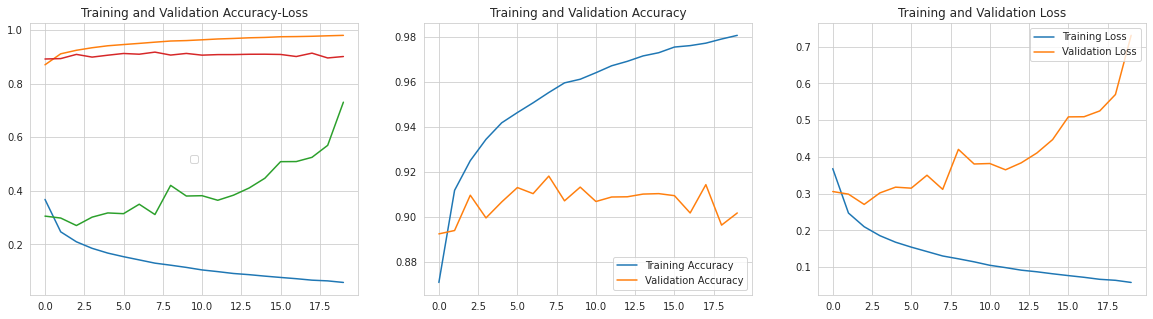

In [124]:
summaryhistory(model1)

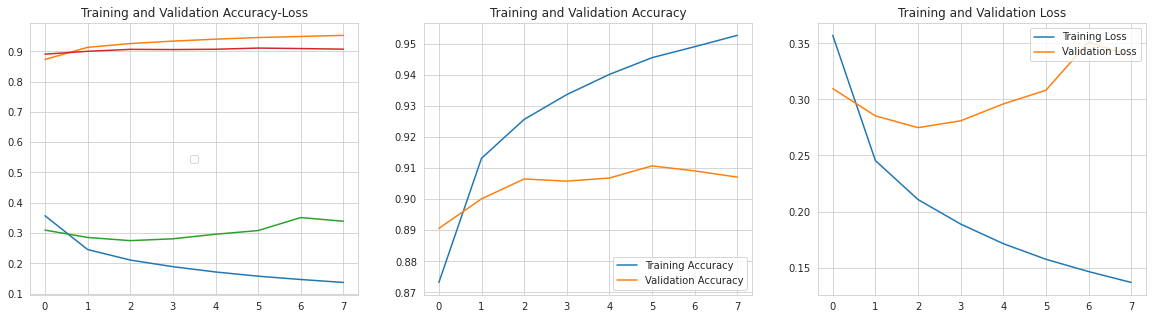

In [125]:
summaryhistory(model2)

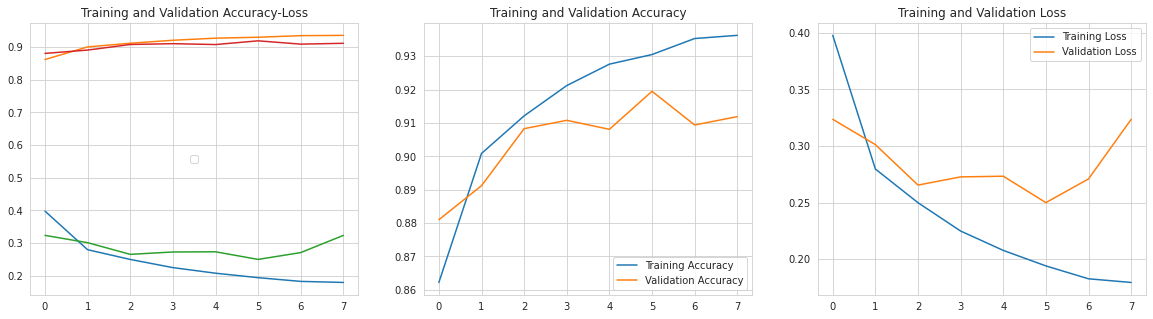

In [126]:
summaryhistory(model3)

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
def Model_Evaluation(modelname):
    print('='*30,'Score_evaluate','='*30)
    print()
    score = modelname.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0],' '*10 ,'Test accuracy:', score[1])
    print()
    pred_prob = modelname.predict(X_test)
    y_pred = np.argmax(pred_prob, axis=1)
    print('='*30,'total false predict','='*30)
    print("for x_test total false predict:",(y_test != y_pred).sum())
    print()
    print('='*30,'Classification Report','='*30)
    print(classification_report(y_test, y_pred))
    print()
    print('='*30,'Confusion Matrix','='*30)
    print(confusion_matrix(y_test, y_pred))
    print()
    print('='*30,'Confusion Matrix','='*30)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn', linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 10})

============================== Score_evaluate ==============================

Test loss: 0.7310383915901184            Test accuracy: 0.9016000032424927

============================== total false predict ==============================
for x_test total false predict: 984

============================== Classification Report ==============================
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1000
           1       0.96      0.98      0.97      1000
           2       0.89      0.81      0.85      1000
           3       0.93      0.85      0.89      1000
           4       0.85      0.87      0.86      1000
           5       0.95      0.98      0.97      1000
           6       0.67      0.81      0.73      1000
           7       0.97      0.94      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90    

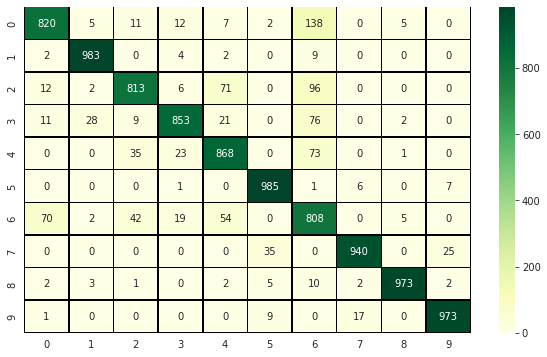

In [129]:
Model_Evaluation(model1)

============================== Score_evaluate ==============================

Test loss: 0.3081487715244293            Test accuracy: 0.9107000231742859

============================== total false predict ==============================
for x_test total false predict: 893

============================== Classification Report ==============================
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.97      0.98      0.98      1000
           2       0.86      0.87      0.86      1000
           3       0.94      0.87      0.90      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.74      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91    

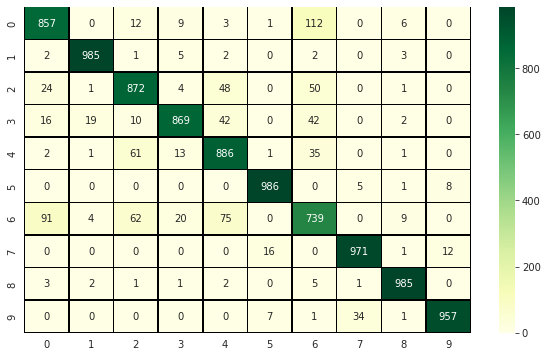

In [130]:
Model_Evaluation(model2)             #model2 useing  early stop

============================== Score_evaluate ==============================

Test loss: 0.24992091953754425            Test accuracy: 0.9194999933242798

============================== total false predict ==============================
for x_test total false predict: 805

============================== Classification Report ==============================
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.83      0.92      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.72      0.77      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92   

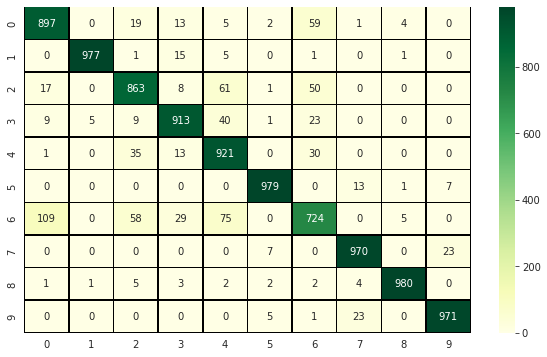

In [131]:
Model_Evaluation(model3)            #model3 useing early stop, dropout, BatchNormalization

In [ ]:
# class_weigth :bütün classlar eşit sayıda burada bu özelliği kulamaya gerek yok

## Prediction

In [132]:
from keras.preprocessing import image

In [133]:
model3.save("Image Classification_cnn.h5")   # for x_test total false predict: 805 min değer  model3 

In [134]:
model=tf.keras.models.load_model('Image Classification_cnn.h5')

In [135]:
samples_Prediction=[X_test[55], X_test[58]]

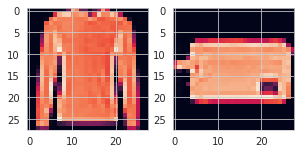

In [143]:
plt.figure(figsize = (10,5))
index=1
for i in samples_Prediction:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [137]:
samples = np.array(samples_Prediction)
samples

array([[[[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.6117647 ],
         ...,
         [0.38039216],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.7372549 ],
         ...,
         [0.47843137],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.20784314],
         ...,
         [0.21960784],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [138]:
pred_prob = model.predict(samples)
pred_prob

array([[7.66468525e-04, 1.87008524e-08, 9.95267749e-01, 1.16823435e-06,
        5.70469529e-05, 3.71130113e-07, 3.90692847e-03, 1.72744929e-08,
        6.90162061e-09, 2.54540851e-07],
       [1.73387118e-04, 3.17411068e-05, 1.14292234e-04, 4.26950399e-04,
        2.46158525e-05, 7.15083443e-05, 2.34119734e-03, 2.67020660e-05,
        9.96588588e-01, 2.00964030e-04]], dtype=float32)

In [139]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([2, 8])

In [140]:
y_test[55],y_test[58]

(2, 8)

In [141]:
classes[y_test[55]]

'Pullover'

In [142]:
classes[y_test[58]]

'Bag'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___